# Basic Data Visualization

**Cytoscape is an open source software platform for integrating, visualizing, and analyzing measurement data in the context of networks.**

This tutorial presents a scenario of how expression and network data can be combined to tell a biological story and includes these concepts:

- Visualizing networks using expression data.
- Filtering networks based on expression data.
- Assessing expression data in the context of a biological network.

## Loading Network
You can download the [demo network session file](https://nrnb.org/data/BasicDataVizDemo.cys) to your current working directory by running…

In [1]:
download.file("https://nrnb.org/data/BasicDataVizDemo.cys", "./BasicDataVizDemo.cys", 'curl')

Now open the demo network using…

In [2]:
library(RCy3)
openSession(file.location = "./BasicDataVizDemo.cys")

file 
"/home/jovyan/BasicDataVizDemo.png"

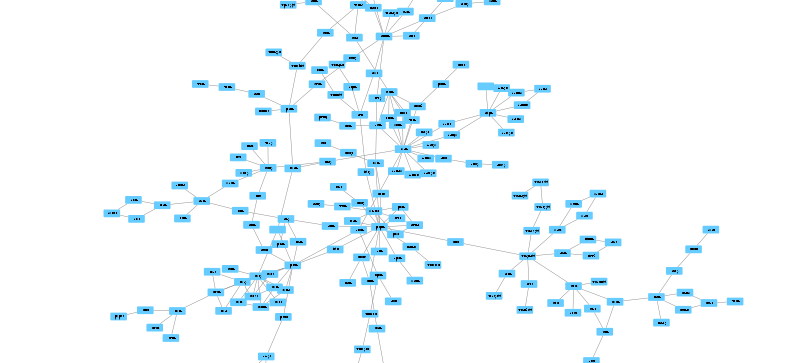

In [10]:
library(IRdisplay)
exportImage("BasicDataVizDemo.png")
display_png(file = "BasicDataVizDemo.png")

## Visualizing Expression Data on Networks

Probably the most common use of expression data in Cytoscape is to set the **visual properties** of the nodes (color, shape, border) in a network according to expression data. This creates a powerful visualization, portraying functional relation and experimental response at the same time. Here, we will show an example of doing this.

The data used in this example is from yeast, and represents an experiment of perturbations of the genes **Gal1**, **Gal4**, and **Gal80**, which are all yeast transcription factors.

For this tutorial, the experimental data was part of the Cytoscape session file you loaded earlier, and is visible in the Node Table:

![Galbrowse3.png](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/Galbrowse3.png)

- You can select nodes in the network by

In [11]:
selectNodes(c("YDL194W", "YLR345W"), by.col = "name")

$nodes
[1] 66 61

$edges
list()


Selecting one or more nodes in the network will update the Node Table to show only the corresponding row(s).

![SelectNodes.PNG](https://github.com/nrnb/gsod2019_kozo_nishida/raw/master/images/SelectNodes.PNG)

We can now use the data to manipulate the visual properties of the network by mapping specific data columns to visual style properties:

- The **gal80Rexp** expression values will be mapped to node color; nodes with low expression will be colored blue, nodes with high expression will be colored red.
- Significance for expression values will be mapped to Node Border Width, so nodes with significant changes will appear with a thicker border.

### Set Node Fill Color
- Click on the **Style** tab in the Control Panel. And you can set node fill color by

In [12]:
gal80Rexp.score.table <- getTableColumns('node','gal80Rexp')
gal80Rexp.min <- min(gal80Rexp.score.table, na.rm = T)
gal80Rexp.max <- max(gal80Rexp.score.table, na.rm = T)
gal80Rexp.center <- gal80Rexp.min + (gal80Rexp.max - gal80Rexp.min)/2
setNodeColorMapping('gal80Rexp', c(gal80Rexp.min, gal80Rexp.center, gal80Rexp.max), c('#0000FF', '#FFFFFF', '#FF0000'))

- This produces an initial gradient ranging from blue to red for expression values. Notice that the nodes in the network change color.

![](images/SetNodeFillColor.png)